# Understanding the Dynamics of Audio Classification in Command Recognition


In [4]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import wavfile
from scipy.io.wavfile import read as read_wav
import librosa
import librosa.display
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset classes

dataset_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/'

classes = []
items = os.listdir(dataset_path)
index = 0
while index < len(items):
    item = items[index]
    if os.path.isdir(os.path.join(dataset_path, item)):
        classes.append(item)
    index += 1

print(classes)

['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'two', 'house', 'marvel', 'down', 'six', 'yes', 'on', 'five', 'off', 'four']


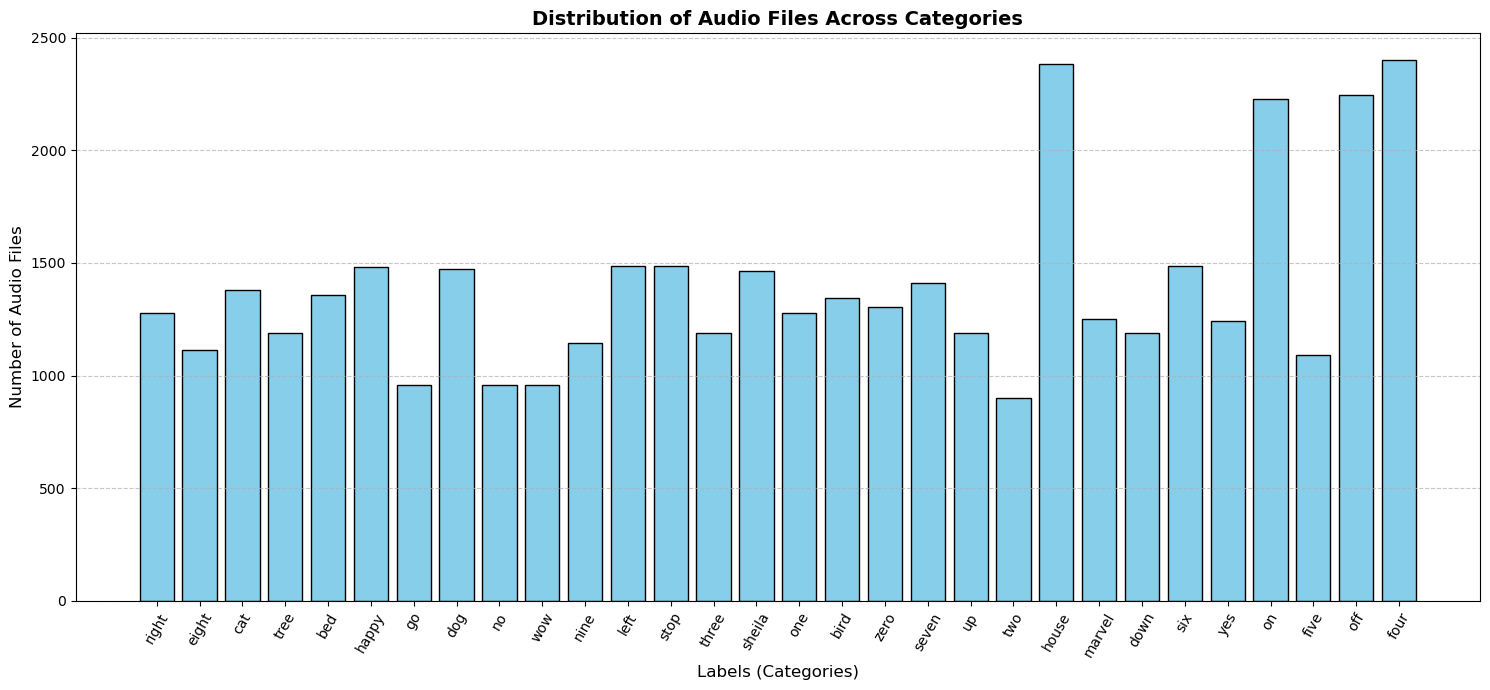

In [6]:
# Visualise the count of audio files for each class in the data.

train_directory = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset'

categories = [category for category in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, category))]

file_counts = []
for category in categories:
    category_path = os.path.join(train_directory, category)
    file_counts.append(len(os.listdir(category_path)))

plt.figure(figsize=(15, 7))
plt.bar(categories, file_counts, color='skyblue', edgecolor='black')
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Labels (Categories)', fontsize=12)
plt.ylabel('Number of Audio Files', fontsize=12)
plt.title('Distribution of Audio Files Across Categories', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


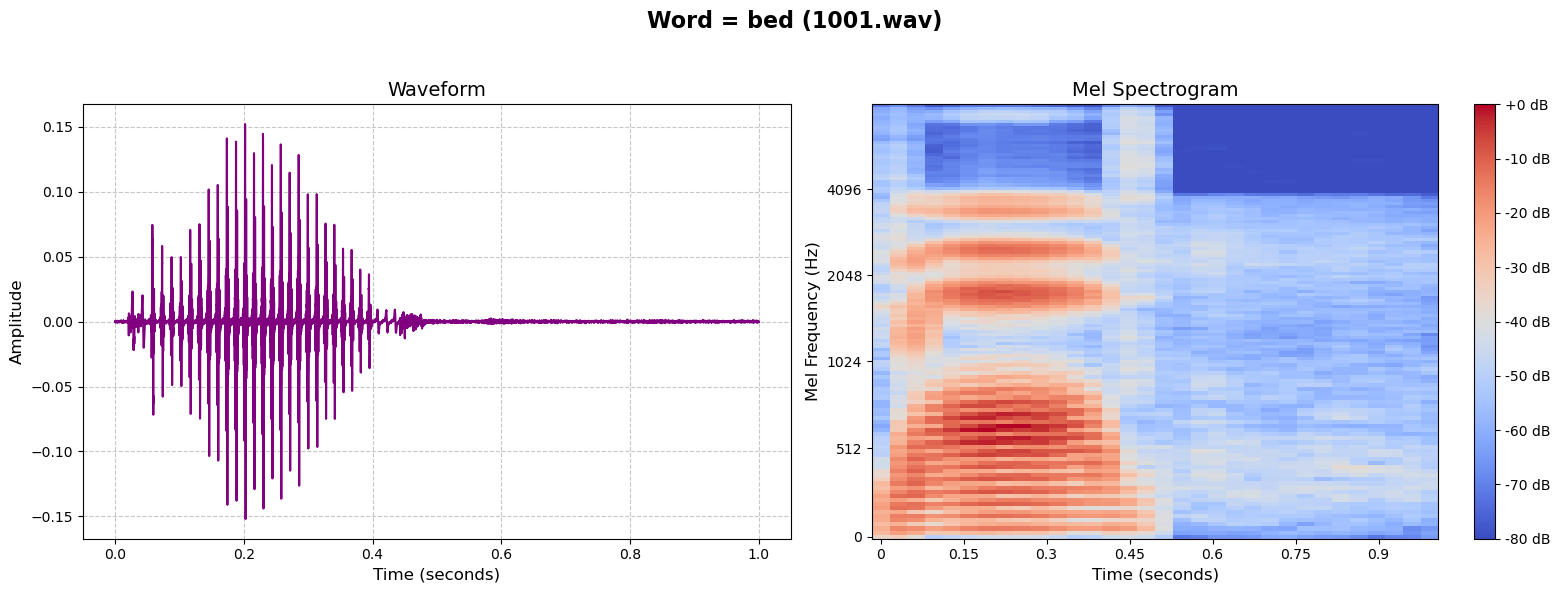

In [7]:
# Visualise a sigle audio file for "Bed" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/bed/1001.wav'
samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = bed ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


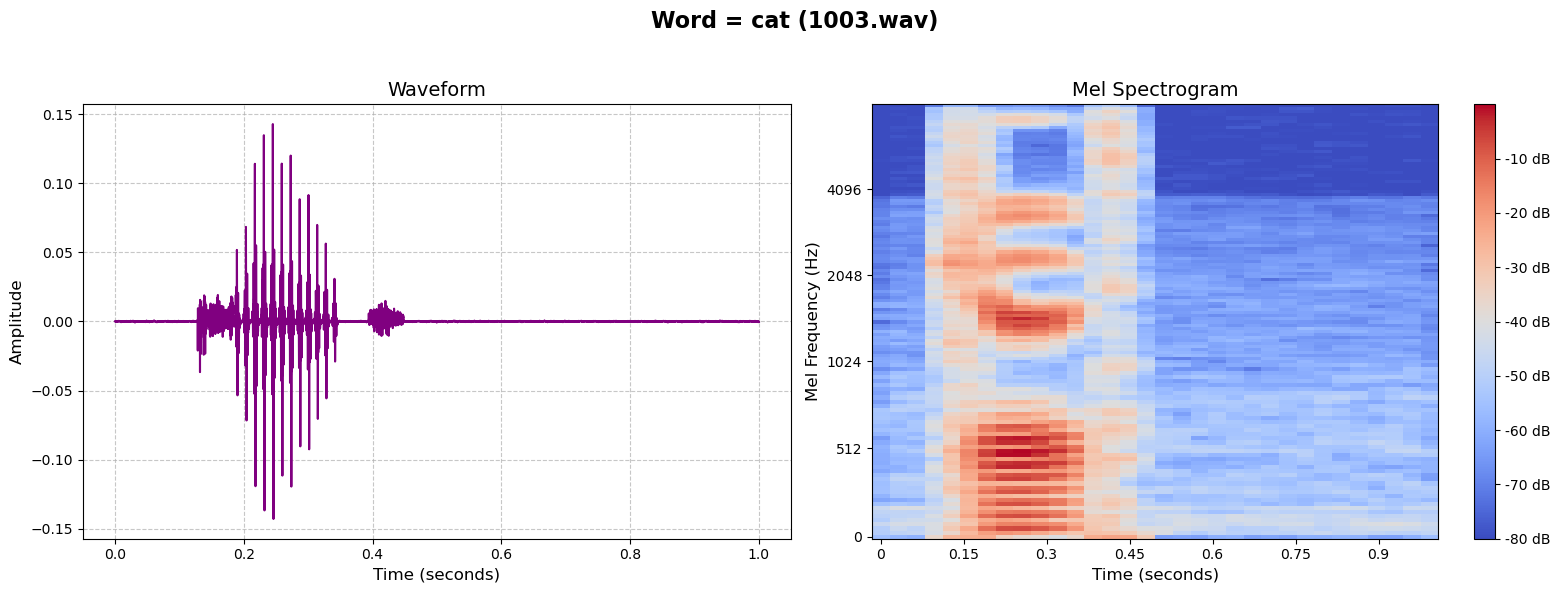

In [8]:
# Visualise a sigle audio file for "cat" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/cat/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = cat ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Audio samples shape: (16000,)
Sample rate: 16000 Hz


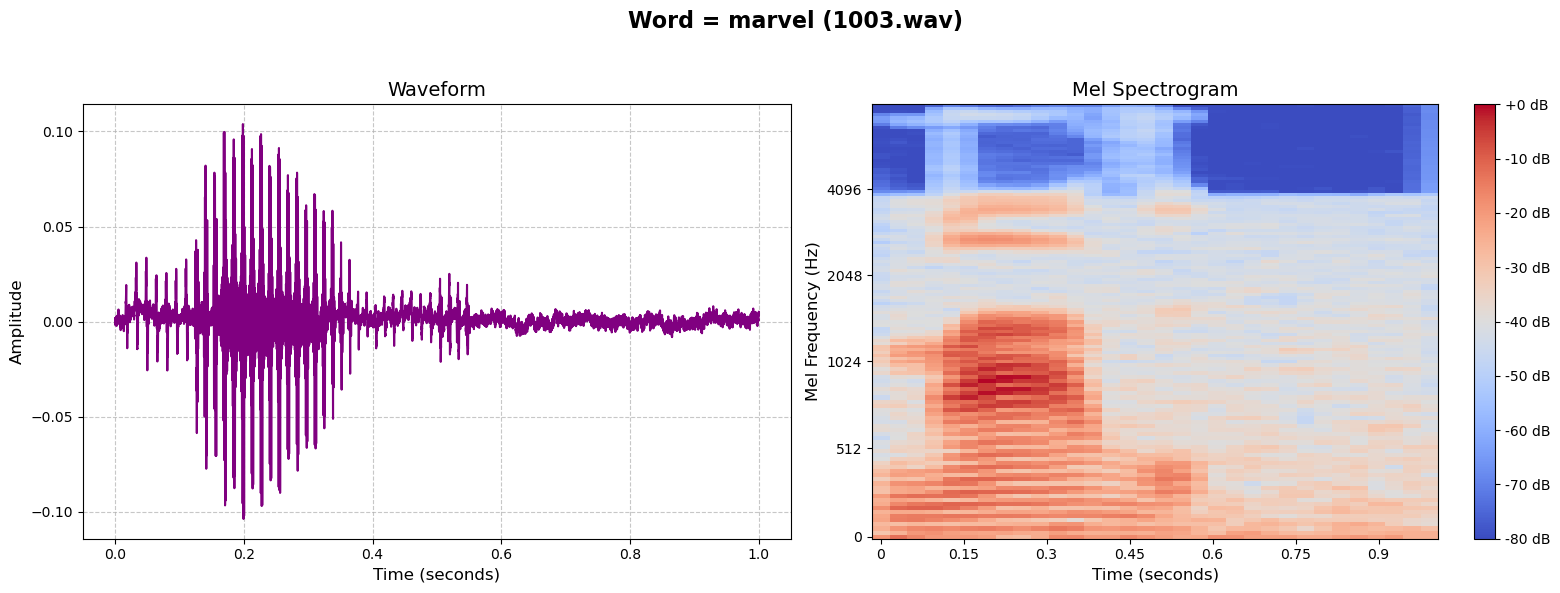

In [9]:
# Visualise a sigle audio file for "marvel" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/marvel/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = marvel ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


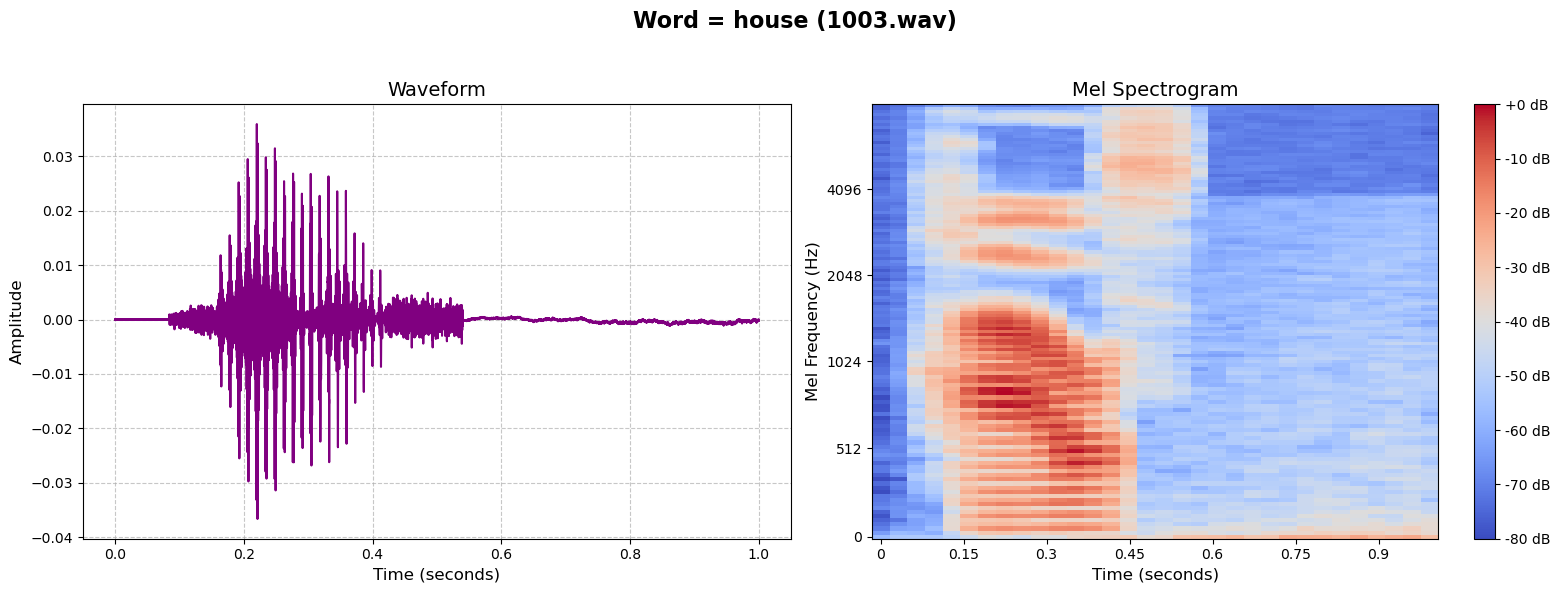

In [10]:
# Visualise a sigle audio file for "house" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/house/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = house ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


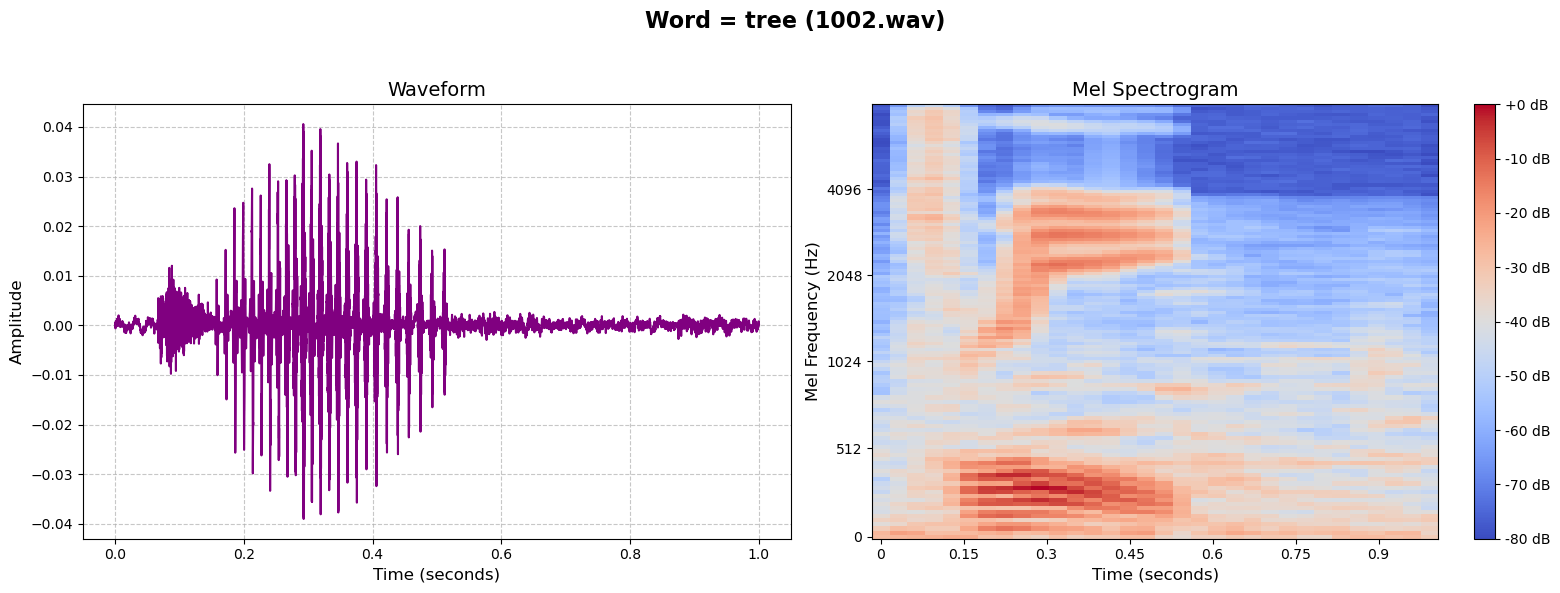

In [11]:
# Visualise a sigle audio file for "tree" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/tree/1002.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = tree ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


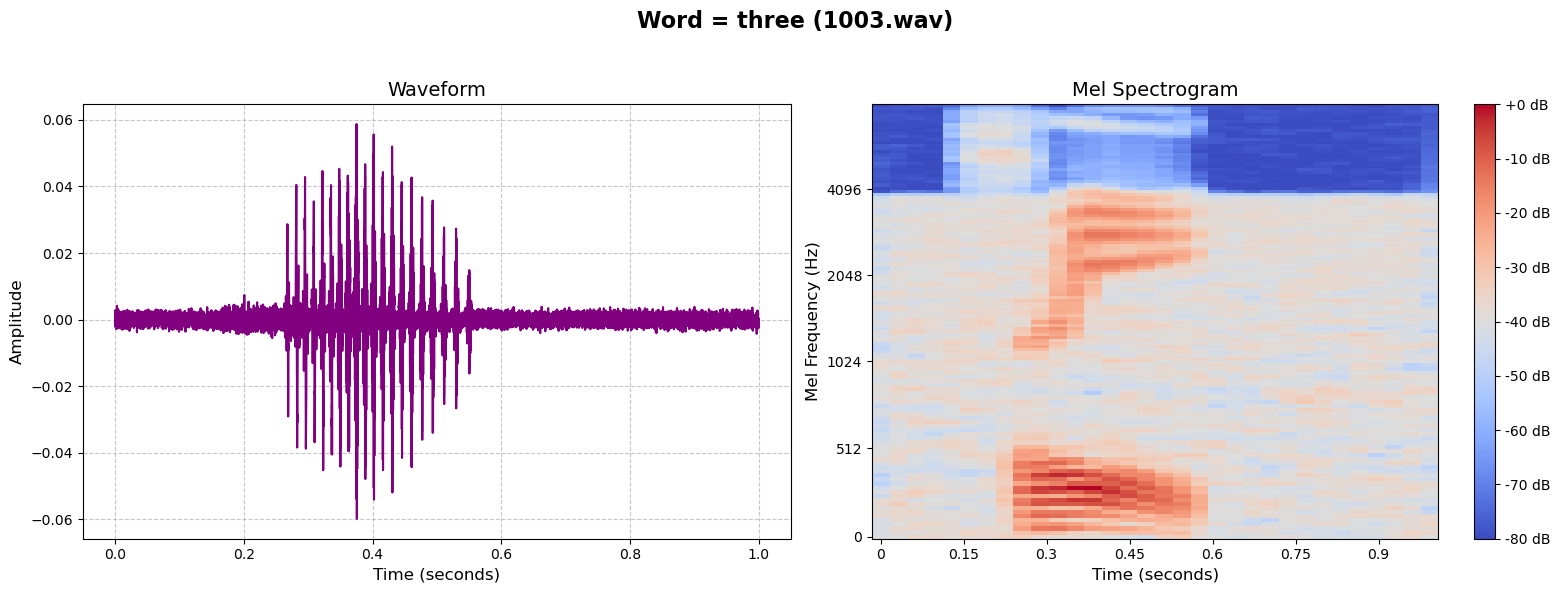

In [12]:
# Visualise a sigle audio file for "three" class using Spectogram.

audio_path = '/Users/abhishek/Desktop/Projects/Abhi/augmented_dataset/three/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = three ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

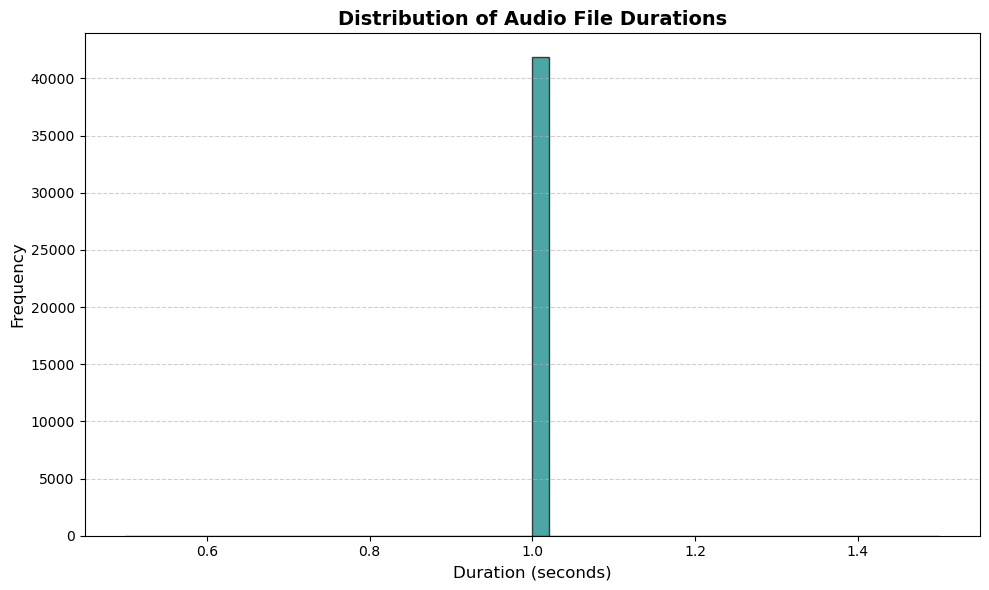

In [13]:
# visualising the duration of audio files.

recording_durations = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith('.wav'):
                file_path = os.path.join(category_path, file)
                
                try:
                    sample_rate, audio_data = read_wav(file_path)
                    duration = len(audio_data) / sample_rate
                    recording_durations.append(duration)
                except Exception as e:
                    print(f"Error processing file {file}: {e}")

plt.figure(figsize=(10, 6))
plt.hist(recording_durations, bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Audio File Durations", fontsize=14, fontweight='bold')
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
# Pre-process all the raw audio files in each class into same size.

audio_data = []
audio_labels = []

for category in classes:
    category_path = os.path.join(train_directory, category)
    print(f"Processing category: {category}")
    
    for file_name in os.listdir(category_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(category_path, file_name)
            
            audio_samples, sr = librosa.load(file_path, sr=8000)
            if len(audio_samples) == 8000:
                audio_data.append(audio_samples)
                audio_labels.append(category)

print(f"Total processed audio files: {len(audio_data)}")
print(f"Unique labels: {set(audio_labels)}")

Processing category: right
Processing category: eight
Processing category: cat
Processing category: tree
Processing category: bed
Processing category: happy
Processing category: go
Processing category: dog
Processing category: no
Processing category: wow
Processing category: nine
Processing category: left
Processing category: stop
Processing category: three
Processing category: sheila
Processing category: one
Processing category: bird
Processing category: zero
Processing category: seven
Processing category: up
Processing category: two
Processing category: house
Processing category: marvel
Processing category: down
Processing category: six
Processing category: yes
Processing category: on
Processing category: five
Processing category: off
Processing category: four
Total processed audio files: 41849
Unique labels: {'nine', 'one', 'five', 'bird', 'house', 'seven', 'two', 'stop', 'bed', 'sheila', 'marvel', 'off', 'tree', 'no', 'go', 'dog', 'up', 'four', 'cat', 'left', 'happy', 'three', 'rig

In [15]:
# Using label encoder method to assign the number of labels.

le = LabelEncoder()
y = le.fit_transform(audio_labels)
classes = list(le.classes_)
y1 = to_categorical(y, num_classes=len(classes))

In [17]:
# Label data

y1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y1.shape

(41849, 30)

In [18]:
# Splitting the data into train and test datasets using 80:20 split ratio.

from sklearn.model_selection import train_test_split


X = np.array(audio_data)
X_reshaped = X.reshape(X.shape[0], 8000, 1)
y = np.array(y1)

x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, shuffle=True)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (33479, 8000, 1)
Testing data shape: (8370, 8000, 1)


In [19]:
# Importing the libraries required for CNN model building.

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# First CNN Model Architecture


In [20]:
# CNN model architecture with different layers.

model = Sequential()

# first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))
model.add(MaxPooling1D(pool_size=2))

# second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-04-02 21:40:11.915172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7998, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3999, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3997, 128)         24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1998, 128)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1996, 256)         98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 998, 256)         0

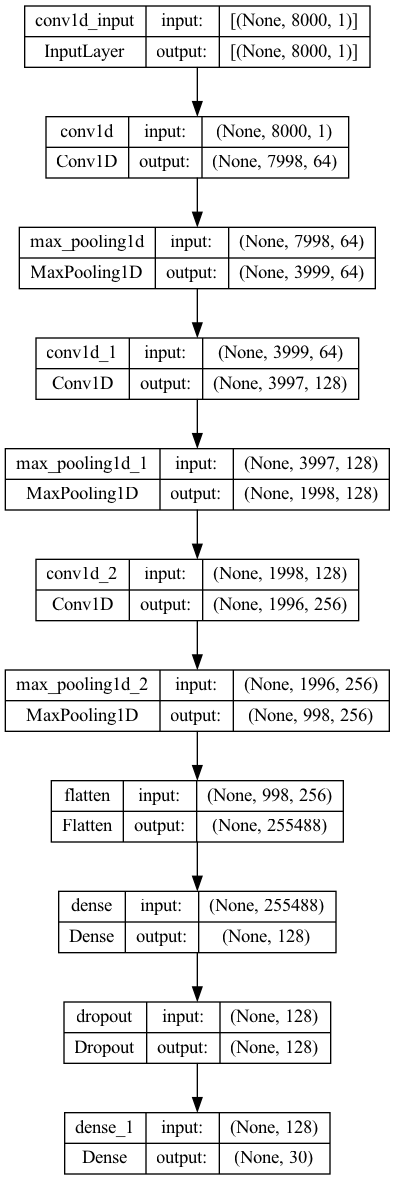

In [23]:
# Plot the model design
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/Users/vinaykumarreddynusum/Desktop/Projects/Abhi/Model_1.png', show_shapes=True, show_layer_names=True)

In [22]:
%%time
# Fit the 1st model on train data (Training Phase)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1047/1047 [==============================] - 372s 355ms/step - loss: 2.7586 - accuracy: 0.1975 - val_loss: 1.8206 - val_accuracy: 0.4841
Epoch 2/10
1047/1047 [==============================] - 365s 349ms/step - loss: 1.9355 - accuracy: 0.3955 - val_loss: 1.4714 - val_accuracy: 0.5364
Epoch 3/10
1047/1047 [==============================] - 358s 342ms/step - loss: 1.6252 - accuracy: 0.4696 - val_loss: 1.2424 - val_accuracy: 0.6139
Epoch 4/10
1047/1047 [==============================] - 346s 331ms/step - loss: 1.4507 - accuracy: 0.5135 - val_loss: 1.1371 - val_accuracy: 0.6464
Epoch 5/10
1047/1047 [==============================] - 345s 329ms/step - loss: 1.3309 - accuracy: 0.5473 - val_loss: 1.1089 - val_accuracy: 0.6560
Epoch 6/10
1047/1047 [==============================] - 345s 330ms/step - loss: 1.2317 - accuracy: 0.5766 - val_loss: 1.0500 - val_accuracy: 0.6792
Epoch 7/10
1047/1047 [==============================] - 339s 324ms/step - loss: 1.1359 - accuracy: 0.6084 - val_

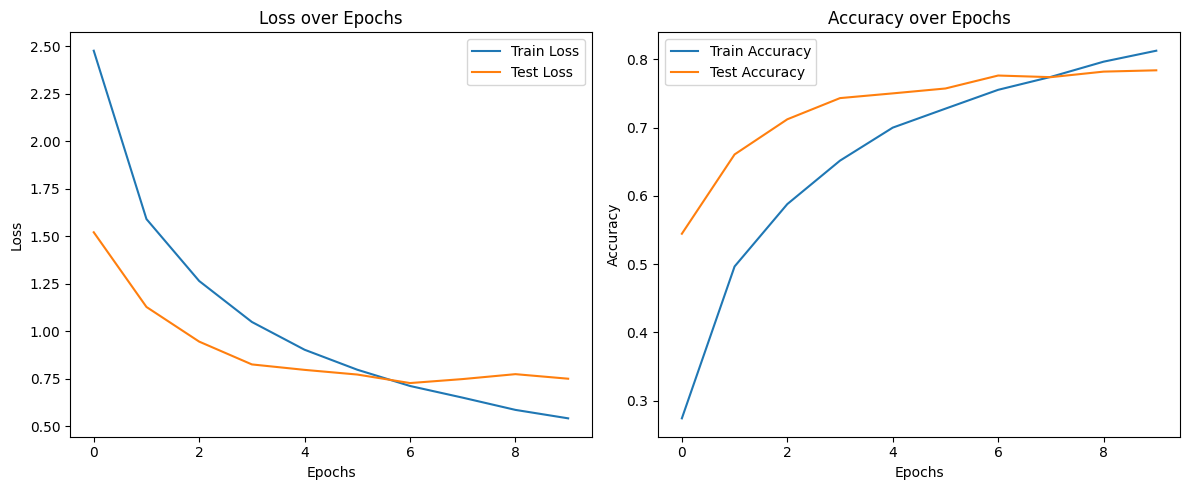

In [22]:
# Visualise 1st CNN the model performance

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

# 2nd CNN Model Architecture


In [25]:
# CNN model architecture with different layers.


model2 = Sequential()

# first convolutional layer
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))

# second convolutional layer
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

# fourth convolutional layer
model2.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

# fifth convolutional layer
model2.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(classes), activation='softmax'))
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 7998, 64)          256       
                                                                 
 conv1d_4 (Conv1D)           (None, 7996, 128)         24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3998, 128)        0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 3996, 128)         49280     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1998, 128)        0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1996, 256)        

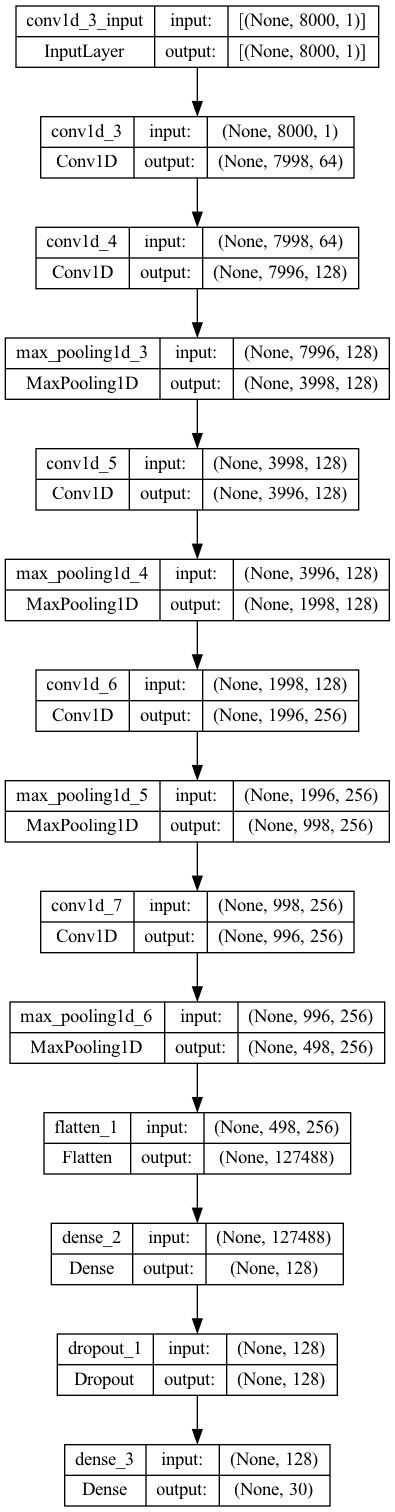

In [26]:
# Plot the 2nd model design
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='/Users/vinaykumarreddynusum/Desktop/Projects/Abhi/Model_2.png', show_shapes=True, show_layer_names=True)

In [24]:
# Fit the 2nd model on train data.

history = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 171s 152ms/step - accuracy: 0.0504 - loss: 3.3827 - val_accuracy: 0.0564 - val_loss: 3.3642
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 143ms/step - accuracy: 0.0571 - loss: 3.3686 - val_accuracy: 0.0564 - val_loss: 3.3634
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0553 - loss: 3.3658 - val_accuracy: 0.0564 - val_loss: 3.3631
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0588 - loss: 3.3660 - val_accuracy: 0.0564 - val_loss: 3.3628
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0540 - loss: 3.3662 - val_accuracy: 0.0564 - val_loss: 3.3631
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0588 - loss: 3.3649 - val_accuracy: 0.0599 - val_loss: 3.3633
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0582 - loss: 3.3657 - val_accuracy: 0.0564 - val_loss: 3.3628
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - ac

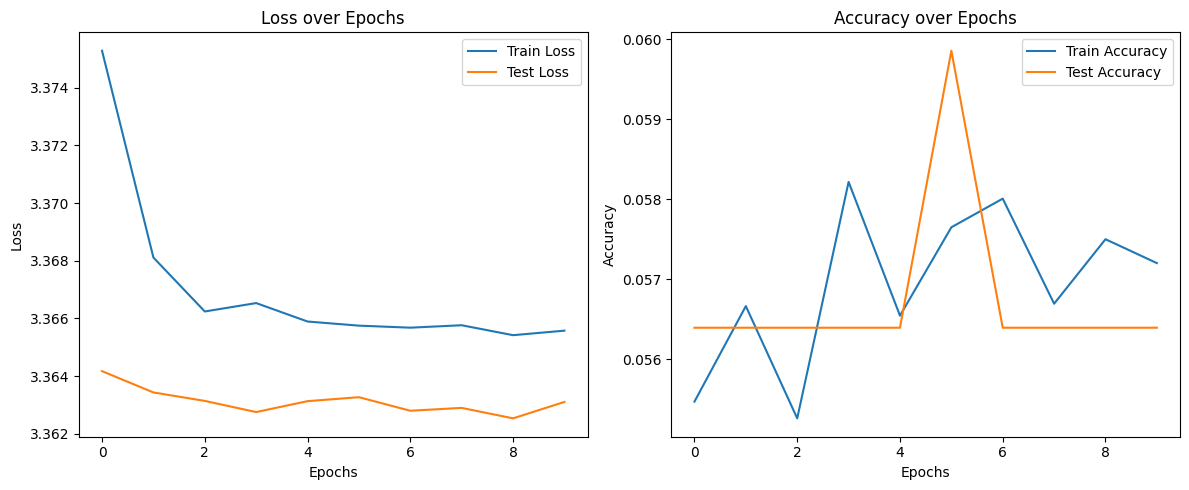

In [25]:
# Visualising the 2nd CNN model performance

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

# 3rd CNN Model Architecture


In [27]:
# CNN model architecture with different layers.

model3 = Sequential()

# first convolutional layer
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))

# second convolutional layer
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

# fourth convolutional layer
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

# fifth convolutional layer
model3.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

# sixth convolutional layer
model3.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

# seventh convolutional layer
model3.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(len(classes), activation='softmax'))
model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 7998, 64)          256       
                                                                 
 conv1d_9 (Conv1D)           (None, 7996, 64)          12352     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 3998, 64)         0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 3996, 128)         24704     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1998, 128)        0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 1996, 128)        

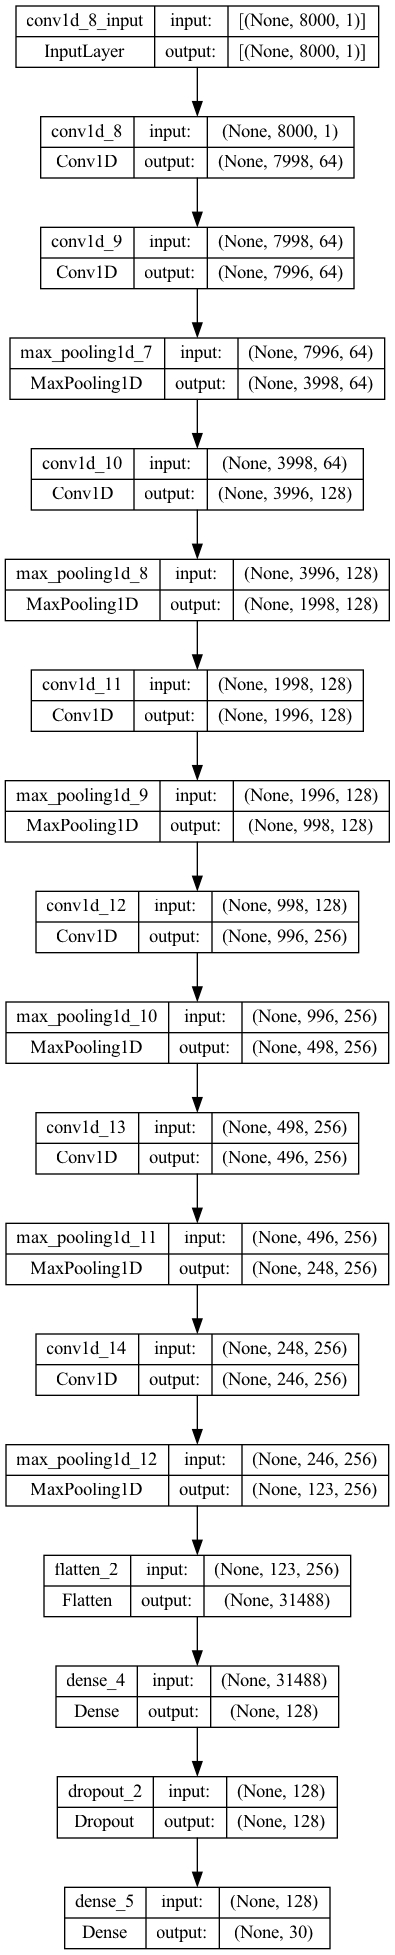

In [28]:
# Plot the 3rd model design
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='/Users/vinaykumarreddynusum/Desktop/Projects/Abhi/Model_3.png', show_shapes=True, show_layer_names=True)

In [27]:
# Fit the 3rd model on train data.

history = model3.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 106s 95ms/step - accuracy: 0.0541 - loss: 3.3835 - val_accuracy: 0.0564 - val_loss: 3.3653
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0552 - loss: 3.3700 - val_accuracy: 0.0564 - val_loss: 3.3633
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0569 - loss: 3.3670 - val_accuracy: 0.0564 - val_loss: 3.3632
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0549 - loss: 3.3660 - val_accuracy: 0.0564 - val_loss: 3.3630
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0586 - loss: 3.3658 - val_accuracy: 0.0599 - val_loss: 3.3628
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0554 - loss: 3.3636 - val_accuracy: 0.0599 - val_loss: 3.3630
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0576 - loss: 3.3650 - val_accuracy: 0.0564 - val_loss: 3.3627
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0578 

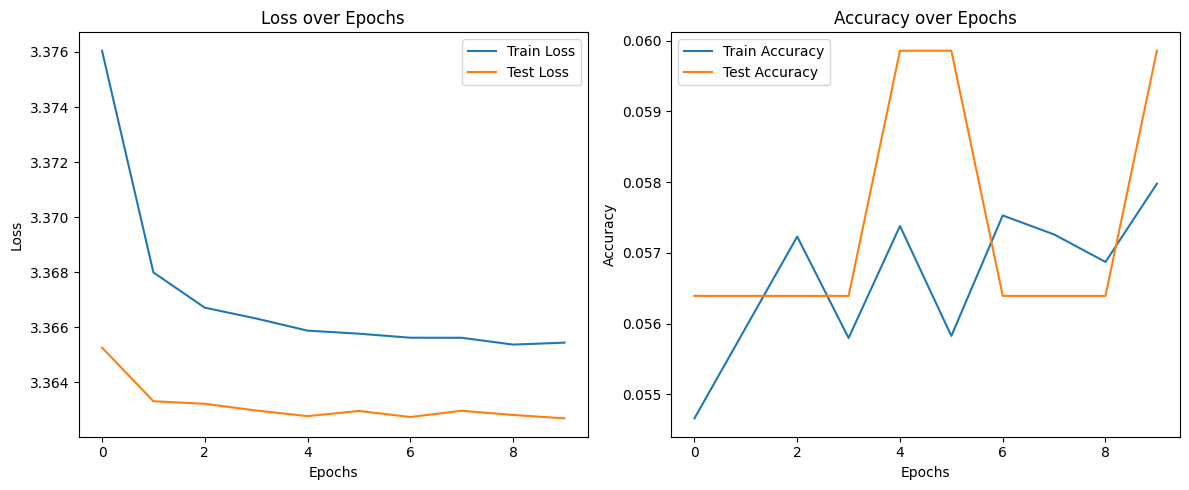

In [28]:
# Visualising the 3nd CNN model performance

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()